In [1]:
import sys
sys.path.append('/Users/benj/Documents/SpEC-class')
import SEC_Class as sp
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/IrBenchmark/10 mVs-1/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/IrBenchmark/10 mVs-1/CV-3.3.0.0__0.csv


2
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.3501621398377465
        Period:1399.9992762833133
        Phase: 0.00044236935224576014 
        Offset: 0.7911801074751459
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


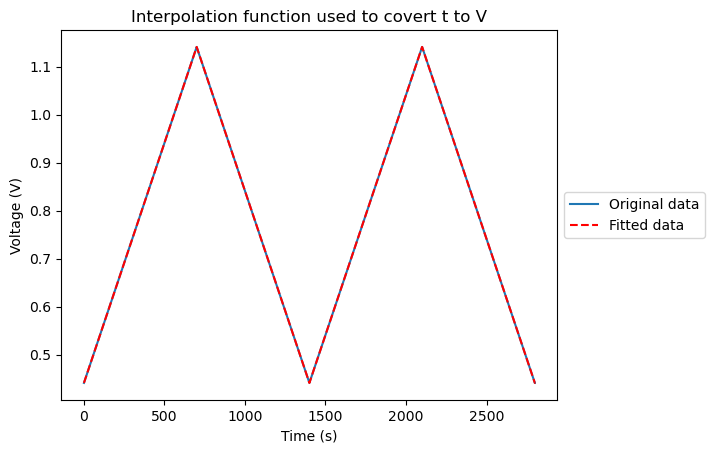

{0: {'Anodic':              t_s     Ewe_V       I_A
  0       0.100000  0.441011 -0.001328
  1       0.200000  0.441108 -0.001046
  2       0.300000  0.441205 -0.000826
  3       0.400000  0.441306 -0.000654
  4       0.500000  0.441409 -0.000518
  ...          ...       ...       ...
  6996  699.700012  1.140969  0.000564
  6997  699.799988  1.141075  0.000566
  6998  699.900024  1.141177  0.000567
  6999  700.000000  1.141270  0.000569
  7000  700.100037  1.141364  0.000570
  
  [7001 rows x 3 columns],
  'Cathodic':                t_s     Ewe_V       I_A
  7001    700.200012  1.141273  0.000568
  7002    700.299988  1.141164  0.000564
  7003    700.400024  1.141061  0.000562
  7004    700.500000  1.140978  0.000560
  7005    700.600037  1.140881  0.000557
  ...            ...       ...       ...
  13996  1399.700073  0.441408 -0.000021
  13997  1399.800049  0.441309 -0.000022
  13998  1399.900024  0.441209 -0.000022
  13999  1400.000000  0.441119 -0.000021
  14000  1400.099976  0.44

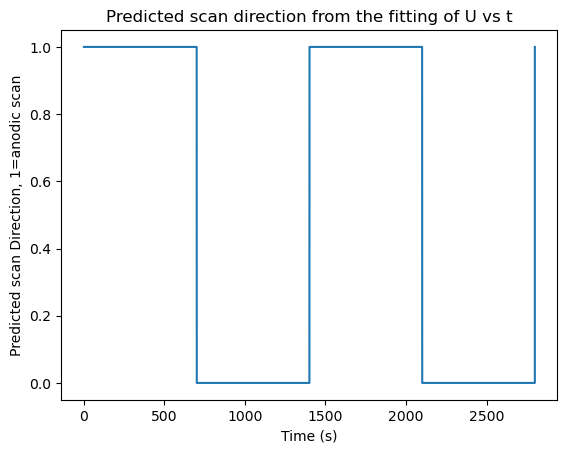

In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.Downsample_spec_scans(0.001, 1)
SpEC1.populate_CV_scans()


In [4]:

"""
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                      Title=f'Cycle {key} {key2}',
                                      y_max=0.1, y_min=-0.0,
                                      x_min=400, x_max=800,
                                      reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                      scan_direction=key2,
                                      cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                      Title=f'Cycle {key} {key2}',
                                      y_max=0.1, y_min=-0.0,
                                      x_min=400, x_max=800,
                                      reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                      scan_direction=key2,
                                      cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

"""

'\noutput_dir = \'Plots\'\nfull_output_path = os.path.join(AndorPath.parent, output_dir)\nos.makedirs(full_output_path, exist_ok=True)\n\nfor key, value in SpEC1.CV_scans.items():\n\n        for key2, value2 in value.items():\n            CV=SpEC1.CV_scans[key][key2]\n            if key2 == \'Anodic\':\n                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)\n                sp.Co_plot_DOD_and_CV(test,\n                                      CV,\n                                      Title=f\'Cycle {key} {key2}\',\n                                      y_max=0.1, y_min=-0.0,\n                                      x_min=400, x_max=800,\n                                      reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",\n                                      scan_direction=key2,\n                                      cmap_option=cmc.roma)\n            elif key2 == \'Cathodic\':\n                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)\n                sp.Co_

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.4V_{Ag/AgCl}$)'>)

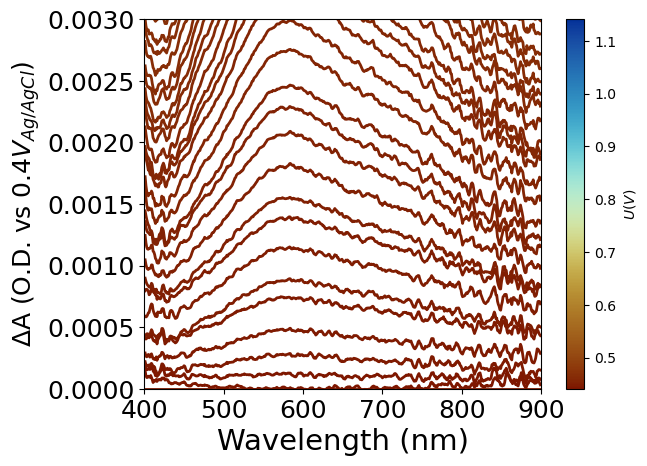

In [132]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', 0.4, 11)

# get only data between 400 and 850 nm
data = data[(data.index > 400) & (data.index < 900)]
sp.plot_DOD(data, y_max=0.003, y_min=0, x_min=400, x_max=900, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")


Voltage (V),0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,...,1.132,1.133,1.134,1.135,1.136,1.137,1.138,1.139,1.140,1.141
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
401,0.0,0.000146,0.000194,0.000219,0.000290,0.000405,0.000421,0.000588,0.000795,0.000897,...,0.093662,0.093790,0.093768,0.093842,0.093890,0.093902,0.093918,0.093957,0.094022,0.094173
402,0.0,0.000106,0.000166,0.000194,0.000264,0.000403,0.000438,0.000582,0.000807,0.000872,...,0.093032,0.093160,0.093146,0.093232,0.093250,0.093217,0.093222,0.093260,0.093315,0.093473
403,0.0,0.000091,0.000154,0.000184,0.000258,0.000409,0.000446,0.000587,0.000807,0.000853,...,0.092567,0.092695,0.092696,0.092779,0.092778,0.092728,0.092727,0.092764,0.092809,0.092978
404,0.0,0.000092,0.000155,0.000185,0.000265,0.000418,0.000447,0.000599,0.000801,0.000841,...,0.092223,0.092353,0.092372,0.092442,0.092430,0.092383,0.092383,0.092418,0.092454,0.092634
405,0.0,0.000102,0.000163,0.000193,0.000278,0.000429,0.000443,0.000616,0.000791,0.000835,...,0.091958,0.092092,0.092130,0.092181,0.092164,0.092131,0.092137,0.092171,0.092200,0.092388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.0,0.000067,0.000098,0.000150,0.000306,0.000472,0.000535,0.000710,0.000870,0.000919,...,0.097687,0.097760,0.097816,0.097913,0.097900,0.097944,0.097956,0.097955,0.097975,0.098096
846,0.0,0.000072,0.000088,0.000165,0.000296,0.000472,0.000544,0.000685,0.000844,0.000898,...,0.097532,0.097608,0.097672,0.097739,0.097713,0.097759,0.097800,0.097800,0.097816,0.097939
847,0.0,0.000056,0.000091,0.000170,0.000278,0.000460,0.000530,0.000669,0.000824,0.000855,...,0.097427,0.097490,0.097554,0.097621,0.097624,0.097620,0.097673,0.097713,0.097702,0.097827


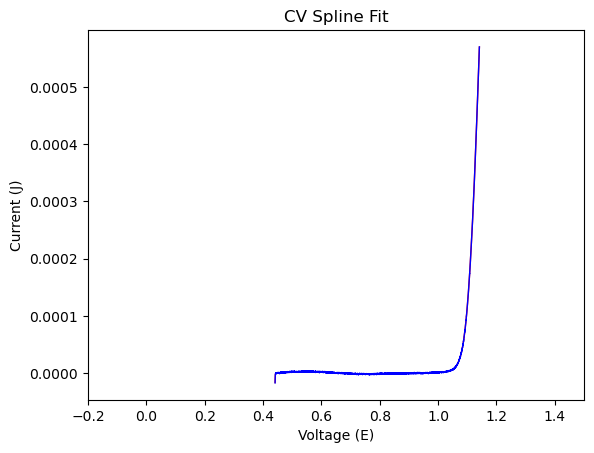

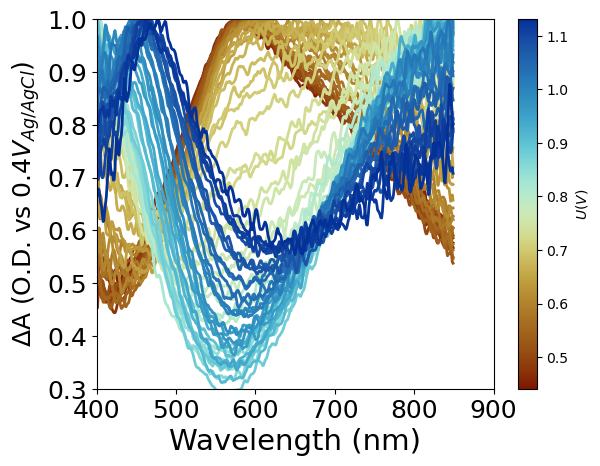

In [124]:
J=SpEC1.CV_scans[1]['Anodic']['I_A']
U=SpEC1.CV_scans[1]['Anodic']['Ewe_V']

data_corr=sp.iR_correct_spectrum(data, J, U, 42)
data_diff=sp.calculate_differential_spectra(DOD_dataframe=data_corr, voltage_step=0.01, smooth_strength=5, Normalise=True)

sp.plot_DOD(data_diff, y_max=1, y_min=0.3, x_min=400, x_max=900, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

data

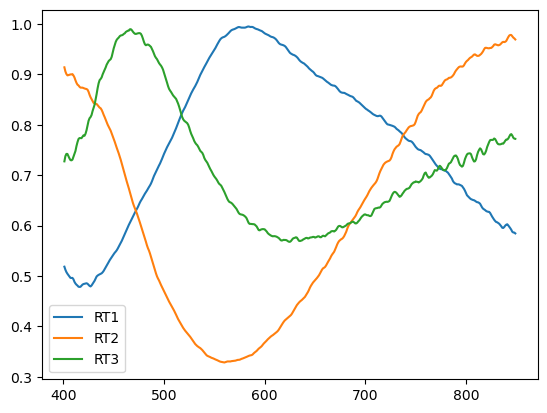

In [125]:
alpha1=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.4, 0.5)
alpha2=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.85, 0.9)
alpha3=sp.extract_average_spectrum_in_voltage_window(data_diff, 1.1, 1.2)

# 

# plot the extracted spectra

fig, ax = plt.subplots()
ax.plot(alpha1.index, alpha1, label='RT1')
ax.plot(alpha2.index, alpha2, label='RT2')
ax.plot(alpha3.index, alpha3, label='RT3')

# add the legend
ax.legend()

In [126]:
from scipy.optimize import lsq_linear
import pandas as pd
import numpy as np

# Assuming alpha1, alpha2, alpha3, and data are already defined
CompsInd = pd.concat([alpha1, alpha2, alpha3], axis=1)

# Generate a coefficients array which is the same shape as C
AT = data.copy(deep=True)
coeffs = np.zeros((AT.shape[1], CompsInd.shape[1]))

# Define the initial lower and upper bounds for each coefficient
lower_bounds1 = np.zeros(CompsInd.shape[1])  # Example: all lower bounds are 0
lower_bounds2 = np.zeros(CompsInd.shape[1])  # Example: all lower bounds are 0
lower_bounds3 = np.zeros(CompsInd.shape[1])  # Example: all lower bounds are 0
upper_bounds = np.ones(CompsInd.shape[1]) * np.inf  # Example: all upper bounds are infinity

# Solve the least squares problem with bounds for each column in AT
for i in range(AT.shape[1]):
    if i == 0:
        result = lsq_linear(CompsInd, AT.iloc[:, i].T, bounds=(lower_bounds1, upper_bounds))
        coeffs[i, :] = result.x
    else:
        lower_bounds1 = coeffs[i-1, 0]
        lower_bounds2 = coeffs[i-1, 1]
        lower_bounds3 = coeffs[i-1, 2]
        result = lsq_linear(CompsInd, AT.iloc[:, i].T, bounds=([lower_bounds1, lower_bounds2, lower_bounds3], upper_bounds))
        coeffs[i, :] = result.x



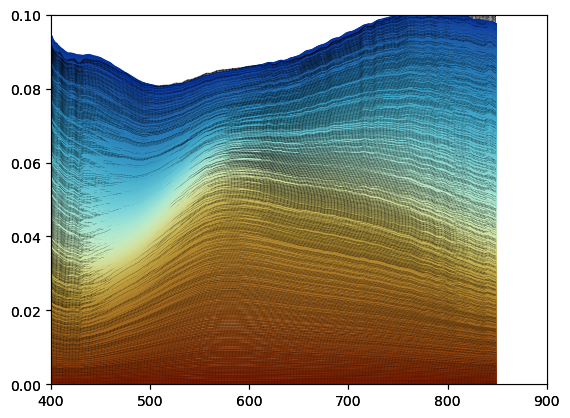

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import cmcrameri.cm as cmc

# Assuming AT, coeffs, and CompsInd are already defined
cmap = cmc.roma
colors = cmap(np.linspace(0, 1, AT.shape[1]))
pred = np.zeros(AT.shape)

# Function to compute and plot spectra
def compute_and_plot(i):
    # Calculate the predicted spectra by multiplying the coefficients by the extracted spectra
    pred[:, i] = np.dot(coeffs[i, :], CompsInd.T)
    # Plot the actual spectra
    plt.plot(AT.index, AT.iloc[:, i], linewidth=1, color=colors[i])
    # Plot the predicted spectra
    plt.plot(AT.index, pred[:, i], linewidth=0.2, linestyle='--', color='black')

    # set axis limits
    plt.xlim(400, 900)
    plt.ylim(0, 0.1)
    

# Use ThreadPoolExecutor to parallelize the loop
with ThreadPoolExecutor() as executor:
    executor.map(compute_and_plot, range(AT.shape[1]))

# Show the plot
plt.show()

# calculate the residuals
residuals = AT - pred


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.66V_{Ag/AgCl}$)'>)

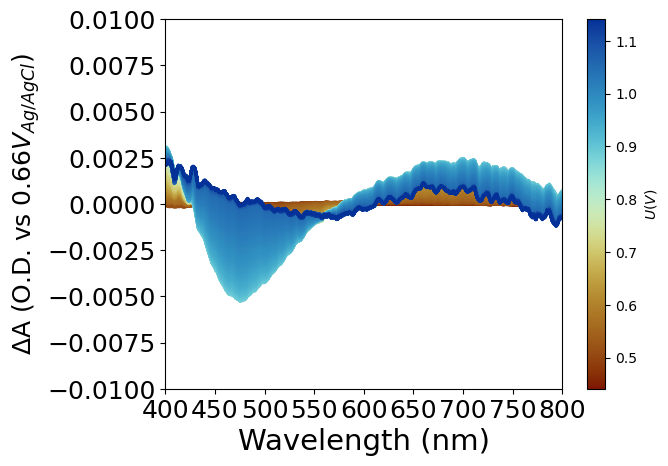

In [128]:
# make a deep copy of the residuals
residuals2 = residuals.copy(deep=True)
# add 0.26 on the collumn names of the residuals
residuals2.columns = residuals.columns 
# plot the residuals
sp.plot_DOD(residuals2, y_max=0.01, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref2}V_{{Ag/AgCl}}$")

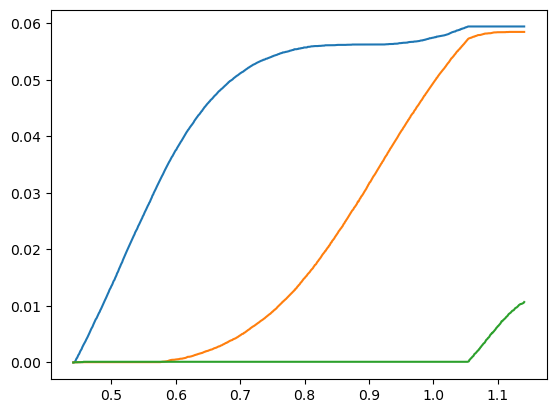

In [129]:
# plot the coefficients against the collumn names of data
fig, ax = plt.subplots()
ax.plot(AT.columns.values, coeffs[:,0])
ax.plot(AT.columns.values, coeffs[:,1])
ax.plot(AT.columns.values, coeffs[:,2])


